# *Preseason Physical Assessments in Amateur Men's Soccer: A Data-Driven Approach*

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
tests = pd.read_csv('../../Desktop/R Files/aver.csv')

In [144]:
tests.head()

,NAME,SJ1,SJ2,SJ3,sjmax,SJAV,CMJ1,CMJ2,CMJ3,cmjmax,CMJAV,EUR,SPRINT1,SPRINT2,sprint,AGILITY1,AGILITY2,agi
0,LUCAS,32.9,35.8,32.9,35.8,33.87,39.80,42.40,42.30,42.40,41.50,1.23,3.09,3.03,3.03,15.26,15.58,15.26
1,MATEO,31.7,30.1,31.2,31.7,31.00,32.90,32.80,34.50,34.50,33.40,1.08,3.26,3.15,3.15,15.75,15.89,15.75
2,PAUL,22.9,24.3,22.9,24.3,23.37,26.20,27.60,28.20,28.20,27.33,1.17,3.38,3.37,3.37,16.56,16.67,16.56
3,THOMAS,35.7,35.1,34.5,35.7,35.10,41.68,42.32,44.23,44.23,42.74,1.22,3.25,3.30,3.25,19.00,18.50,18.50
4,NICK,26.1,26.2,26.1,26.2,26.13,33.40,33.50,34.70,34.70,33.87,1.30,3.39,3.36,3.36,16.25,16.50,16.25


## Selecting Columns
We focus on the maximum scores for key performance metrics (Squat Jump, Countermovement Jump, Sprint 20m, Illinois Agility). Analyzing the best performances gives a clearer picture of each athlete’s peak abilities.


In [74]:
test_df = tests[['NAME', 'sjmax', 'cmjmax', 'sprint', 'agi']]
test_df.head()


,NAME,sjmax,cmjmax,sprint,agi
0,LUCAS,35.8,42.40,3.03,15.26
1,MATEO,31.7,34.50,3.15,15.75
2,PAUL,24.3,28.20,3.37,16.56
3,THOMAS,35.7,44.23,3.25,18.50
4,NICK,26.2,34.70,3.36,16.25


### Standardizing Column Names and Formatting
In this step, we clean and format our dataset by capitalizing athlete names and renaming columns for better readability. This ensures consistency and clarity in the analysis by using more descriptive and standardized labels.


In [75]:
test_df.loc[:, 'NAME'] = test_df.NAME.str.title()

In [76]:
test_df = (test_df.rename(columns = {'NAME': 'Name'
                                     , 'sjmax': 'Squat Jump'
                                     , 'cmjmax': 'Countermovement Jump'
                                     , 'sprint': 'Sprint 20m'
                                     , 'agi': 'Illinois'}))

In [149]:
test_df.head(2)

,Name,Squat Jump,Countermovement Jump,Sprint 20m,Illinois
0,Lucas,35.8,42.4,3.03,15.26
1,Mateo,31.7,34.5,3.15,15.75


## Exploratory Data Analysis
We begin by exploring the distribution and relationships between key performance metrics. This helps us understand the data's overall structure, detect any patterns, and identify correlations that might influence the TSA scores.


In [79]:
test_df.info() # No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  27 non-null     object 
 1   Squat Jump            27 non-null     float64
 2   Countermovement Jump  27 non-null     float64
 3   Sprint 20m            27 non-null     float64
 4   Illinois              27 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


### Descriptive Statistics Summary 
Analyzed preseason testing data for an amateur male soccer team, focusing on key performance metrics such as vertical jump,
sprint speed, and agility. Identified significant variability in lower body power and agility among players, 
which will guide targeted training interventions.

In [81]:
test_df.describe()

,Squat Jump,Countermovement Jump,Sprint 20m,Illinois
count,27.000000,27.000000,27.000000,27.000000
mean,31.718519,36.854074,3.228889,16.341111
std,3.589090,4.628012,0.171360,0.808590
min,24.300000,28.200000,2.960000,15.140000
25%,29.000000,34.000000,3.090000,15.830000
50%,31.200000,36.200000,3.200000,16.140000
75%,34.900000,39.500000,3.355000,16.720000
max,37.500000,46.730000,3.620000,18.500000


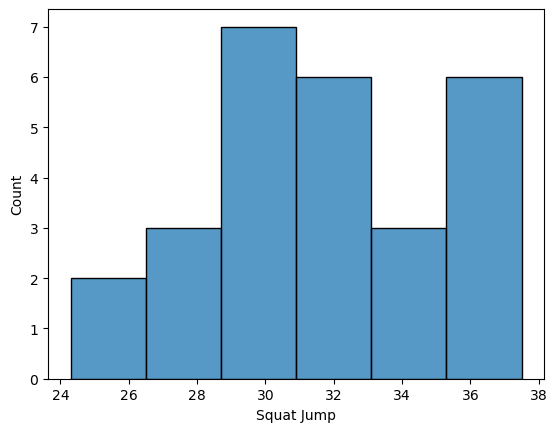

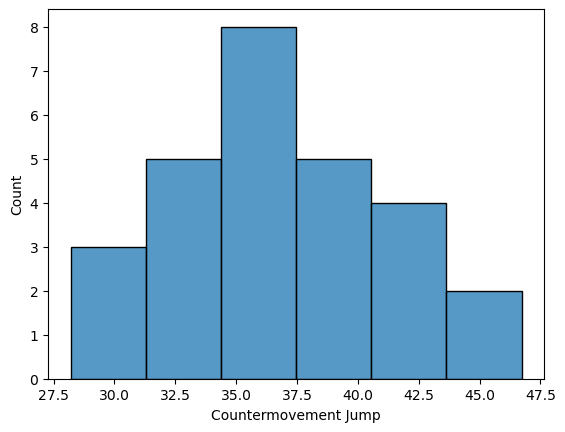

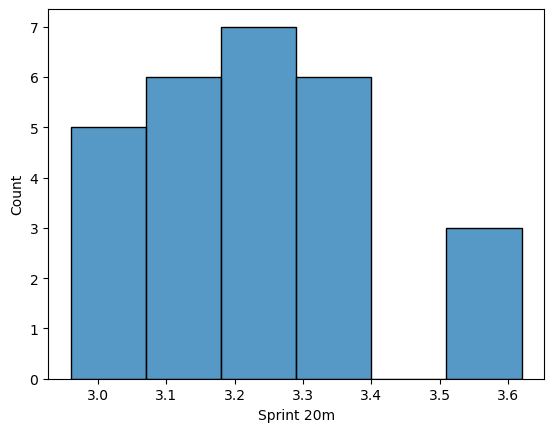

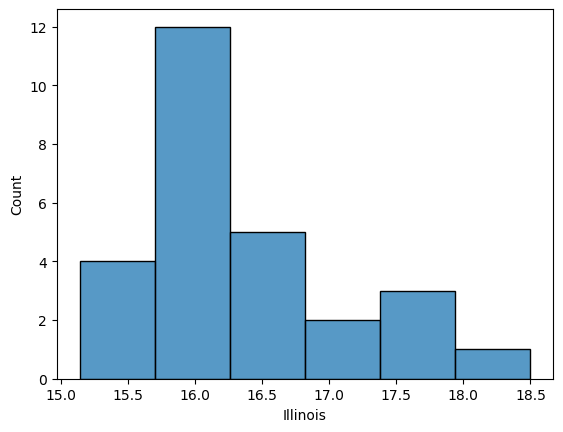

In [82]:
for col in test_df.select_dtypes('number').columns:
    sns.histplot(data=test_df, x=test_df[col])
    plt.xlabel(col)
    plt.show()

## Correlation Matrix
The correlation matrix helps identify relationships between variables. Strong positive or negative correlations indicate how one metric influences another, guiding us in understanding overall athletic performance.


In [84]:
test_df.corr(numeric_only=True)

,Squat Jump,Countermovement Jump,Sprint 20m,Illinois
Squat Jump,1.000000,0.883710,-0.468802,-0.157652
Countermovement Jump,0.883710,1.000000,-0.529156,-0.183851
Sprint 20m,-0.468802,-0.529156,1.000000,0.632367
Illinois,-0.157652,-0.183851,0.632367,1.000000


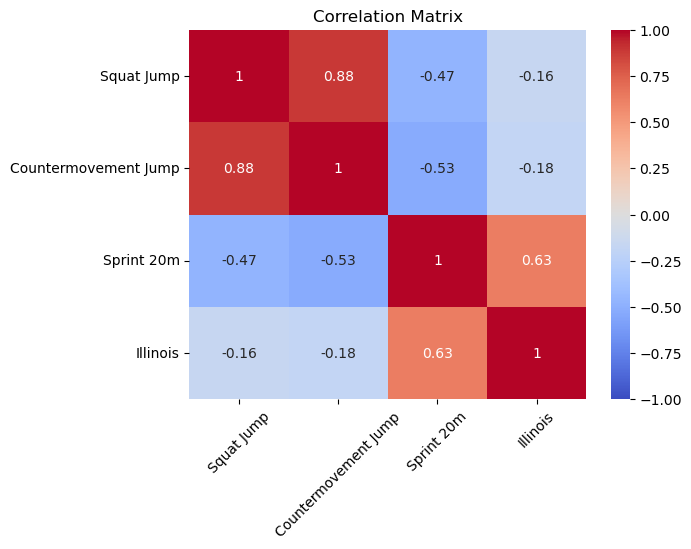

In [85]:
sns.heatmap(test_df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

## Performance Analysis
To better understand the athletes’ performance, we create bar plots for each metric. These visualizations rank athletes based on their scores in each test (Squat Jump, Countermovement Jump, Sprint 20m, Illinois Agility). By sorting and plotting the data, we gain insights into how each athlete compares across different metrics.


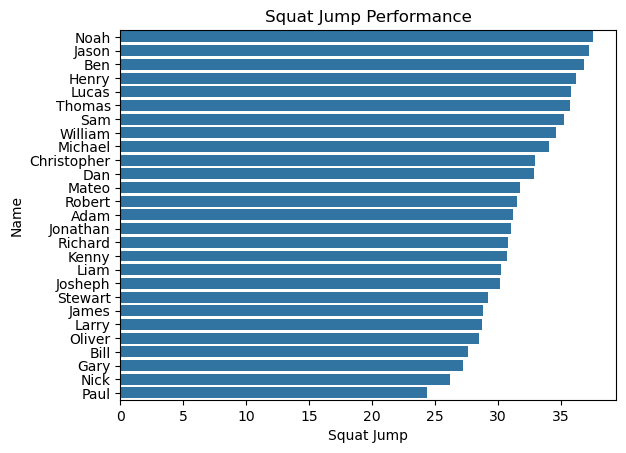

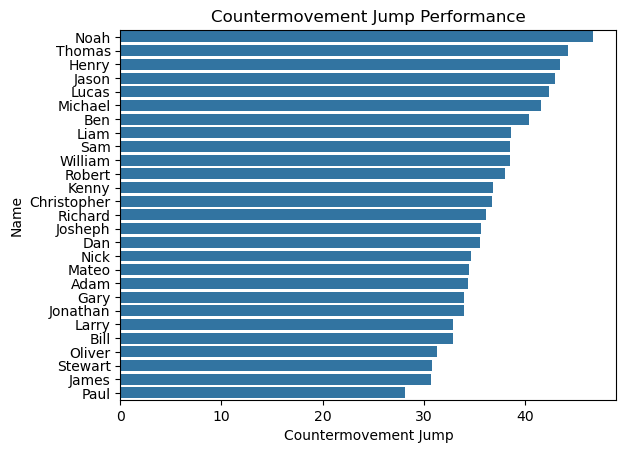

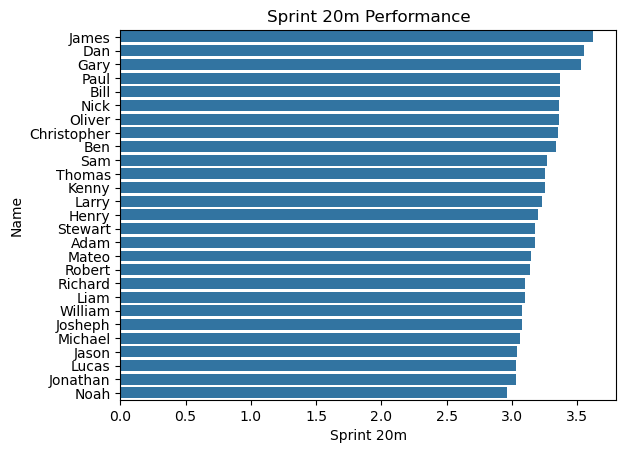

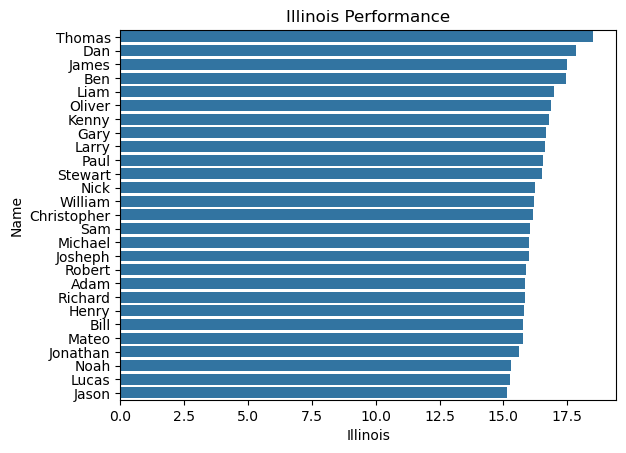

In [87]:
def create_barplots(df, name_column):
  """
  Creates bar plots for each numerical column in the DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    name_column: The name of the column containing names or labels.

  Returns:
    None
  """

  for column in df.columns:
    if column != name_column and pd.api.types.is_numeric_dtype(df[column]):
      df_sorted = df[[name_column, column]].sort_values(by=column, ascending=False)
      sns.barplot(data=df_sorted, x=column, y=name_column)
      plt.title(f"{column} Performance")
      plt.show()

# Usage
create_barplots(test_df, 'Name')

## Total Score of Athleticism
The TSA score combines all metrics into a single value to rank athletes based on overall performance. By averaging standardized scores, we get a balanced view that equally weighs each aspect of athleticism.


### Why Standardize the Metrics?
Standardization scales different metrics to a common range (mean = 0, std = 1). 
This prevents metrics with larger units from dominating the analysis, ensuring each metric equally contributes to the overall TSA score.







In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
std = StandardScaler()
test_z = std.fit_transform(test_df.iloc[:,1:])

In [92]:
test_z = pd.DataFrame(test_z, columns = test_df.iloc[:, 1:].columns)

### Multiplying Time by -1 to reverse the order
For metrics like sprint time and agility, lower values indicate better performance. By multiplying these values by -1, we align them with the jump scores where higher values are better. This allows all metrics to contribute positively to the final TSA score.


In [94]:
test_z.loc[:, 'Sprint 20m'] = test_z['Sprint 20m'] * -1
test_z.loc[:, 'Illinois'] = test_z['Illinois'] * -1

### Final Concatenation
Here, we prepare the dataset by standardizing the performance metrics and combining them with athlete names. This dataset is now ready for calculating the Total Score of Athleticism (TSA) and further analysis.


In [96]:
tsa_model = pd.concat([test_df.Name, test_z], axis=1)

In [97]:
tsa_model.head()

,Name,Squat Jump,Countermovement Jump,Sprint 20m,Illinois
0,Lucas,1.158854,1.221166,1.182762,1.362502
1,Mateo,-0.005258,-0.518347,0.469140,0.744965
2,Paul,-2.106338,-1.905554,-0.839166,-0.275861
3,Thomas,1.130461,1.624117,-0.125545,-2.720803
4,Nick,-1.566871,-0.474309,-0.779698,0.114825


## Calculating the Mean
We calculate the mean of the standardized scores across all metrics to generate a single Total Score of Athleticism (TSA) for each athlete. This mean score gives a balanced overall ranking by equally weighing each performance measure.


In [99]:
tsa_model['TSA'] = tsa_model.iloc[:, 1:].mean(axis=1)

In [100]:
tsa_model.round(2).reset_index(drop=True).head()

,Name,Squat Jump,Countermovement Jump,Sprint 20m,Illinois,TSA
0,Lucas,1.16,1.22,1.18,1.36,1.23
1,Mateo,-0.01,-0.52,0.47,0.74,0.17
2,Paul,-2.11,-1.91,-0.84,-0.28,-1.28
3,Thomas,1.13,1.62,-0.13,-2.72,-0.02
4,Nick,-1.57,-0.47,-0.78,0.11,-0.68


### The Top 3 Athletes
Based on the TSA scores, we identify the top 3 athletes. These individuals demonstrate the highest overall athleticism, considering all performance metrics equally.


In [102]:
tsa_model.sort_values(by='TSA', ascending=False).head(3)

,Name,Squat Jump,Countermovement Jump,Sprint 20m,Illinois,TSA
24,Noah,1.641534,2.174596,1.599041,1.312091,1.681816
10,Jason,1.556356,1.353281,1.123294,1.513735,1.386666
0,Lucas,1.158854,1.221166,1.182762,1.362502,1.231321


### Plot the Results
We visualize the TSA scores to easily compare athletes' overall performance. The bar plot highlights the top performers and provides a clear ranking based on the calculated TSA.


In [104]:
sort = tsa_model.sort_values(by='TSA', ascending=False)

<Axes: xlabel='TSA', ylabel='Name'>

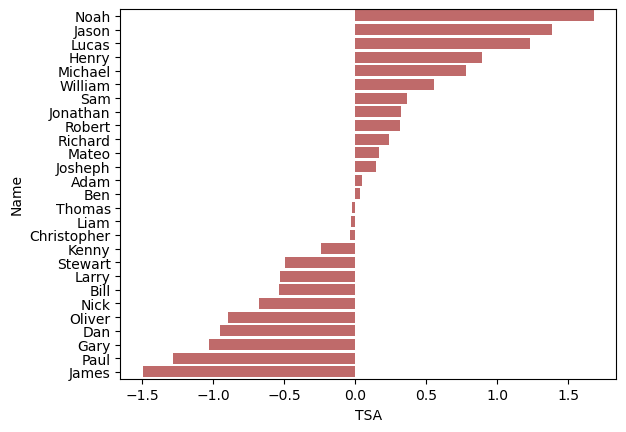

In [105]:
sns.barplot(sort, x='TSA', y='Name', color='indianred')

### Conclusion
This analysis provided a basic exploration of athletic performance using standardized metrics. By calculating the Total Score of Athleticism (TSA), we ranked athletes based on overall performance, allowing us to easily identify top performers. Future work could involve more advanced modeling, such as regression analysis, to gain deeper insights into the factors that contribute most to athletic success.
